<a href="https://colab.research.google.com/github/singularidadedigital/artificial_inteligence/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [12]:
import os
import matplotlib.pyplot as plt
import numpy

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Load the data: Cats vs Dogs dataset

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  43.1M      0  0:00:18  0:00:18 --:--:-- 44.8M


In [4]:
!unzip -q kagglecatsanddogs_5340.zip
!ls


 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


In [5]:
!ls PetImages/

Cat/  Dog/


In [8]:
num_skiped = 0
for folder_name in ('Cat','Dog'):
  folder_path = os.path.join('PetImages',folder_name)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path,fname)
    try:
      fobj = open(fpath,'rb')
      is_jfif = tf.compat.as_bytes('JFIF') in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num_skiped +=1
      # Delete corrupted image
      os.remove(fpath)

print('Deleted %d images' % num_skiped)

Deleted 1590 images


Generate Dataset

In [10]:
image_size = (180,180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'PetImages',
    validation_split=0.2,
    subset='both',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


Visualize Data

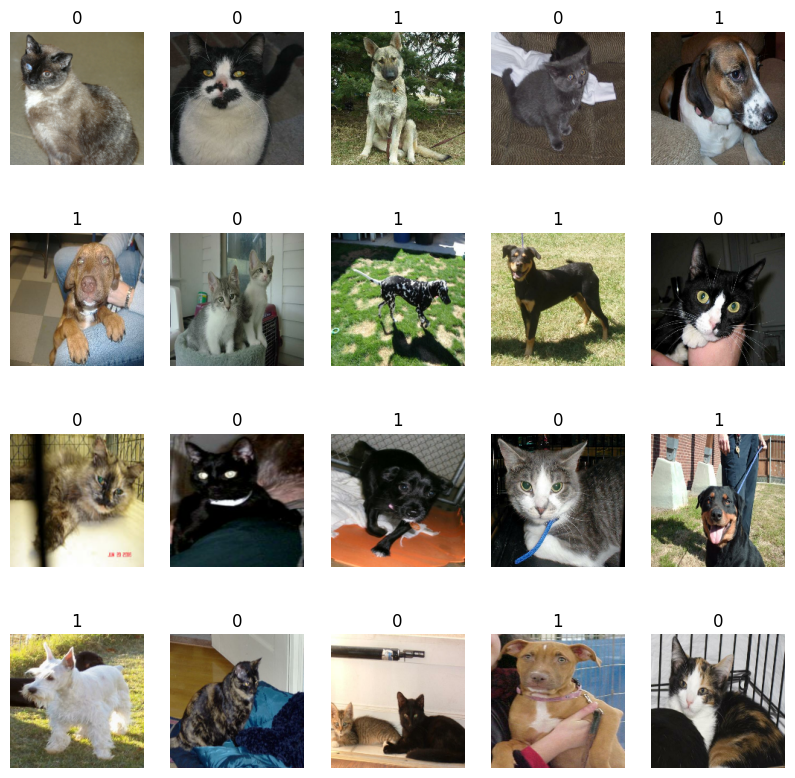

In [19]:
from numpy.ma.core import trace
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis("off")